In [56]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import line_profiler

import datetime

from io import StringIO
from pandas.api.types import CategoricalDtype

import pandas._testing as tm

## returns df from string data
def g(data):
    return pd.read_csv(StringIO(data))

In [155]:
df_merged

,ID,March_Number,March_Amount,Feb_Number,Feb_Amount,Jan_Number,Jan_Amount
0,A,10.0,200.0,1.0,0.0,6.0,800.0
1,B,4.0,300.0,8.0,500.0,1.0,50.0
2,C,2.0,100.0,NaN,NaN,NaN,NaN
3,E,NaN,NaN,4.0,400.0,NaN,NaN
4,F,NaN,NaN,8.0,0.0,NaN,NaN
5,H,NaN,NaN,4.0,200.0,3.0,500.0
6,G,NaN,NaN,NaN,NaN,8.0,100.0


In [159]:
from threading import Thread

def foo(bar):
    return 'foo'

thread = Thread(target=foo, args=('world!',))
thread.start()
ret = thread.join()
print (ret)

None


In [163]:
import concurrent.futures

def foo(bar):
    print('hello {}'.format(bar))
    return 'foo'

with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
    future = executor.submit(foo, 'world!')
    return_value = future.result()
    print(return_value)

hello world!
foo


In [171]:
import yfinance as yf
df = yf.download(tickers='AAPL', start='2019-01-01', end='2021-01-01', period=max, interval='1d')

AttributeError: module 'yfinance' has no attribute 'download'

In [176]:
d = {'Name1':['jaap','piet','tim'],'Name2':['bas','max','piet'], 'Count1':[1,5,2],'Count2' :[2,6,8]}

data = pd.DataFrame(d)
data

,Name1,Name2,Count1,Count2
0,jaap,bas,1,2
1,piet,max,5,6
2,tim,piet,2,8


In [177]:
data.groupby(['Name1','Count1']).sample()

,Name1,Name2,Count1,Count2
0,jaap,bas,1,2
1,piet,max,5,6
2,tim,piet,2,8


In [178]:
d="""ID,Value1,Value2    
ID_1,NaN,2  
ID_2,NaN,7    
ID_1,5,NaN   
ID_2,8,NaN"""
df=g(d)
df

,ID,Value1,Value2
0,ID_1,NaN,2
1,ID_2,NaN,7
2,ID_1,5.0,NaN
3,ID_2,8.0,NaN


In [19]:
df=DataFrame({
    'No Show (%)':[5e-01, 4e-01, np.nan]
})
df

,No Show (%)
0,0.5
1,0.4
2,NaN


In [20]:
df['No Show (%)'] = df['No Show (%)'].transform(lambda x: '{:,.2%}'.format(x))
df

,No Show (%)
0,50.00%
1,40.00%
2,nan%


<AxesSubplot:>

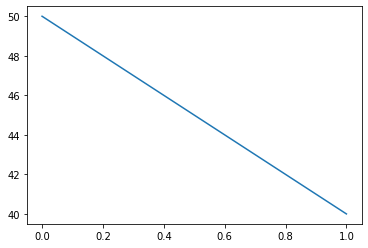

In [21]:
df['No Show (%)'].replace('\%','', regex=True).astype(float).plot()

In [22]:
df = pd.DataFrame({'A':np.arange(1.0,9.0)},index=pd.date_range(start='2020-05-04 08:00:00', freq='1d', periods=8))
df

,A
2020-05-04 08:00:00,1.0
2020-05-05 08:00:00,2.0
2020-05-06 08:00:00,3.0
2020-05-07 08:00:00,4.0
2020-05-08 08:00:00,5.0
2020-05-09 08:00:00,6.0
2020-05-10 08:00:00,7.0
2020-05-11 08:00:00,8.0


In [23]:
ref_date = '2020-05-08'

In [24]:
df['Condi'] = np.where(df.index < ref_date, 'Before', 'After')
df

,A,Condi
2020-05-04 08:00:00,1.0,Before
2020-05-05 08:00:00,2.0,Before
2020-05-06 08:00:00,3.0,Before
2020-05-07 08:00:00,4.0,Before
2020-05-08 08:00:00,5.0,After
2020-05-09 08:00:00,6.0,After
2020-05-10 08:00:00,7.0,After
2020-05-11 08:00:00,8.0,After


In [26]:
df

AttributeError: module 'yfinance' has no attribute 'Ticker'

In [28]:
df

,ID,group,attempts,successes,score
0,1,A,0,1,None
1,1,A,1,0,5
2,1,A,1,0,5
3,1,A,1,0,4
4,2,A,1,0,5
5,2,A,1,0,4
6,3,A,1,0,5
7,3,A,0,1,None
8,3,A,1,0,1
9,4,B,1,0,5


In [32]:
df.loc[df.ID == 5]

,ID,group,attempts,successes,score


In [36]:
df = pd.DataFrame({'day': ['1', '21', '41', '61', '81', '101', '121', '141',
                           '161', '181', '201', '221'],
                   'Sale': [1.08, 0.9, 0.72, 0.58, 0.48, 0.42, 0.37, 0.33, 0.26,
                            0.24, 0.22, 0.11]})
# Generate Some new values
to_add = pd.DataFrame({'day': np.arange(241, 301, 20)})

# Add New Values To End of DataFrame
new_df = pd.concat((df, to_add)).reset_index(drop=True)
new_df

new_df['Sale'] = np.where(new_df['Sale'].isna(),
                          new_df['Sale'].expanding().mean(),
                          new_df['Sale'])
new_df

,day,Sale
0,1,1.080000
1,21,0.900000
2,41,0.720000
3,61,0.580000
4,81,0.480000
5,101,0.420000
6,121,0.370000
7,141,0.330000
8,161,0.260000
9,181,0.240000


In [38]:
d="""X1,X2_nan,x3,x4_nan
34,0,65.8,1
35,1,5432.1,1
87,1,443.1,0
65,0,213.3,0"""
df=g(d)
df

,X1,X2_nan,x3,x4_nan
0,34,0,65.8,1
1,35,1,5432.1,1
2,87,1,443.1,0
3,65,0,213.3,0


In [42]:
df.filter(like='nan')

ValueError: Boolean array expected for the condition, not int64

In [57]:
d="""date,name,number
2021-05-06T07:35:03.000Z,mark,123
2021-04-06T07:35:03.000Z,mark,123
2021-03-03T07:35:03.000Z,mark,123
2021-02-03T07:35:03.000Z,mark,123
2021-05-06T07:35:03.000Z,tom,4123
2021-04-06T07:35:03.000Z,tom,4123
2021-03-03T07:35:03.000Z,tom,4123
2021-02-06T07:35:03.000Z,john,512
2021-02-06T07:35:03.000Z,wood,512
2021-02-06T07:35:03.000Z,wood,512
2020-05-06T07:35:03.000Z,paul,723
2020-04-06T07:35:03.000Z,paul,723
2020-03-03T07:35:03.000Z,paul,723
2020-02-03T07:35:03.000Z,paul,723
2020-02-03T05:35:03.000Z,paul,723
2020-02-02T07:35:03.000Z,paul,723
2020-02-01T07:35:03.000Z,paul,723
2020-05-06T07:35:03.000Z,tomy,623
2020-04-06T07:35:03.000Z,tomy,623
2020-03-03T07:35:03.000Z,tomy,623
2020-02-03T07:35:03.000Z,tomy,623
2020-02-03T05:35:03.000Z,tomy,623
2020-02-02T07:35:03.000Z,tomy,623"""
df=g(d)
df

,date,name,number
0,2021-05-06T07:35:03.000Z,mark,123
1,2021-04-06T07:35:03.000Z,mark,123
2,2021-03-03T07:35:03.000Z,mark,123
3,2021-02-03T07:35:03.000Z,mark,123
4,2021-05-06T07:35:03.000Z,tom,4123
5,2021-04-06T07:35:03.000Z,tom,4123
6,2021-03-03T07:35:03.000Z,tom,4123
7,2021-02-06T07:35:03.000Z,john,512
8,2021-02-06T07:35:03.000Z,wood,512
9,2021-02-06T07:35:03.000Z,wood,512


In [58]:
%timeit np.where(df.groupby('name').cumcount().ge(3), 'old_employee', '')

1.76 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
%timeit df.loc[df.groupby('name').cumcount() >= 3, 'status'] = 'old_employee'

2.29 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [84]:
df = pd.DataFrame({'A': [1, 2, 3],
                   'B': [400, 500, 600]})
new_df = pd.DataFrame({'B': [4, 5, 6],
                       'C': [7, 8, 9]})
df.update(new_df)
df

,A,B
0,1,4
1,2,5
2,3,6


In [91]:
d='''Month,Day,Jane,Bob
Mar,10,"['Orange', 'Apples']","['Banana', 'Apples']"
Mar,11,"['Pear', 'Grape']","['Strawberry', 'Cherry']"'''
df=g(d)
df

,Month,Day,Jane,Bob
0,Mar,10,"['Orange', 'Apples']","['Banana', 'Apples']"
1,Mar,11,"['Pear', 'Grape']","['Strawberry', 'Cherry']"


,Month,Day,level_2,Jane,Bob
0,Mar,10,0,"['Orange', 'Apples']","['Banana', 'Apples']"
1,Mar,11,0,"['Pear', 'Grape']","['Strawberry', 'Cherry']"


In [105]:
csvfile = StringIO("""
Town,Department,Staff,Month,Project,Score
East,Produce,Ethan,1987-08,A814,27
East,Produce,Ethan,1987-09,A848,27
East,Produce,Ethan,1987-10,A736,29
East,Meat,Harry,1987-07,A813,26""")

df = pd.read_csv(csvfile, sep = ',', engine='python')
df

,Town,Department,Staff,Month,Project,Score
0,East,Produce,Ethan,1987-08,A814,27
1,East,Produce,Ethan,1987-09,A848,27
2,East,Produce,Ethan,1987-10,A736,29
3,East,Meat,Harry,1987-07,A813,26


In [112]:
pd.to_datetime(df.Month, format='%Y-%m').dt.month.sort_values()


3     7
0     8
1     9
2    10
Name: Month, dtype: int64

In [113]:
df = pd.DataFrame(data=[
    [1, '2019-01-01', '2019-03-01'],
    [1, '2020-01-03', '2020-05-04'],
    [1, '2020-01-05', '2020-06-01'],
    [1, '2020-01-02', '2020-03-01'],
    [1, '2020-01-07', '2020-02-02'],
    [1, '2020-09-03', '2020-09-05'],
    [1, '2020-09-04', '2020-09-04'],
    [1, '2020-10-01', None], 
    [2, '2020-05-01', '2020-05-03']],
    columns=['customer_id', 'start_date', 'end_date'],

)
df

,customer_id,start_date,end_date
0,1,2019-01-01,2019-03-01
1,1,2020-01-03,2020-05-04
2,1,2020-01-05,2020-06-01
3,1,2020-01-02,2020-03-01
4,1,2020-01-07,2020-02-02
5,1,2020-09-03,2020-09-05
6,1,2020-09-04,2020-09-04
7,1,2020-10-01,None
8,2,2020-05-01,2020-05-03


In [114]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df

,customer_id,start_date,end_date
0,1,2019-01-01,2019-03-01
1,1,2020-01-03,2020-05-04
2,1,2020-01-05,2020-06-01
3,1,2020-01-02,2020-03-01
4,1,2020-01-07,2020-02-02
5,1,2020-09-03,2020-09-05
6,1,2020-09-04,2020-09-04
7,1,2020-10-01,NaT
8,2,2020-05-01,2020-05-03


In [115]:
expected_df = pd.DataFrame(data=[
    [1, '2019-01-01', '2019-03-01'],
    [1, '2020-01-02', '2020-06-01'],
    [1, '2020-09-03', '2020-09-05'],
    [1, '2020-10-01', None], 
    [2, '2020-05-01', '2020-05-03']],
    columns=['customer_id', 'start_date', 'end_date'],
)
expected_df

,customer_id,start_date,end_date
0,1,2019-01-01,2019-03-01
1,1,2020-01-02,2020-06-01
2,1,2020-09-03,2020-09-05
3,1,2020-10-01,None
4,2,2020-05-01,2020-05-03


In [160]:
df = pd.DataFrame({'date':['2021-1-1', '2020-12-6', '2019-02-01', '2020-02-01']})
df.date = pd.to_datetime(df.date)
df

,date
0,2021-01-01
1,2020-12-06
2,2019-02-01
3,2020-02-01


In [161]:
df = df.loc[df.date>'2020.01.01']
df

,date
0,2021-01-01
1,2020-12-06
3,2020-02-01


In [143]:
pd.Timestamp('today').date()

datetime.date(2021, 5, 11)

In [189]:
df = pd.DataFrame({'times':['2021-05-01','2021-05-02','2021-05-03',np.nan],'other':['a','aa','abc','asd']})
df.times = pd.to_datetime(df.times)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   times   3 non-null      datetime64[ns]
 1   other   4 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 192.0+ bytes


In [192]:
#df = df.loc[:,['times']]
df.loc[:,['times']] = df.loc[:,['times']].astype(np.datetime64)
df['times2'] = df.loc[:,['times']].astype(np.datetime64) # option 2
df

,times,times2
0,2021-05-01,2021-05-01
1,2021-05-02,2021-05-02
2,2021-05-03,2021-05-03
3,NaT,NaT


In [178]:
df['times2'] = df.loc[:,['times']].astype(np.datetime64) # option 2

In [2]:
source_df = pd.DataFrame(
    {
        "IDNumber": [4, 5, 6, 7],
        "Text": [
            "Number 4 has a cell phone, lightsaber, and a tablet",
            "Number 5 has a burrito",
            "Number 6 has a lightsaber and the senate",
            "",
        ],
    }
)
source_df

,IDNumber,Text
0,4,"Number 4 has a cell phone, lightsaber, and a t..."
1,5,Number 5 has a burrito
2,6,Number 6 has a lightsaber and the senate
3,7,


In [4]:
keyword_df = pd.DataFrame(
    {
        "Keyword": [
            "lightsaber",
            "microphone",
            "senate",
            6,
        ]
    }
)

keyword_df

,Keyword
0,lightsaber
1,microphone
2,senate
3,6


In [10]:
source_df.Text.str.contains('lightsaber')

0     True
1    False
2     True
3    False
Name: Text, dtype: bool

In [13]:
df = DataFrame({
    'EMA':[10,11,12],
    'Close':[9,8,7]
})

df['diff'] = df['EMA'] - df['Close']
df

,EMA,Close,diff
0,10,9,1
1,11,8,3
2,12,7,5


In [70]:
data = {'CustomerID': ['001', '002', '003', '004'], 'Name': [ 'Tom', 'Joseph', 'Krish', 'John'], 'ClosingDate': ['02/05/2021', '09/05/2021', '18/04/2021', '24/04/2021'], 'Quantity': [5, 6, 19, 4], 'Week': ['Quantity for Week Ending 02/05/2021', 'Quantity for Week Ending 09/05/2021', 'Quantity for Week Ending 18/04/2021', 'Quantity for Week Ending 24/04/2021']}
# Create DataFrame.
df = pd.DataFrame(data)
df

,CustomerID,Name,ClosingDate,Quantity,Week
0,001,Tom,02/05/2021,5,Quantity for Week Ending 02/05/2021
1,002,Joseph,09/05/2021,6,Quantity for Week Ending 09/05/2021
2,003,Krish,18/04/2021,19,Quantity for Week Ending 18/04/2021
3,004,John,24/04/2021,4,Quantity for Week Ending 24/04/2021


In [77]:
week_mask = pd.to_datetime(df.Week.str.split().str[-1], dayfirst=True).sort_values(ascending=False)


In [76]:
pivot_table = df.pivot_table(
    "Quantity", ["CustomerID", "Name", "ClosingDate"], "Week", aggfunc="sum"
).fillna(0)


In [79]:
df1 = pd.DataFrame({
    'no1':['abc', 'pqr'],
    'quantity':[3,5],
    'no2':[123, np.nan]
})

df2 = pd.DataFrame({
    'no1':['abc', 'pqr'],
    'serial':[10,20]
})
df1

,no1,quantity,no2
0,abc,3,123.0
1,pqr,5,NaN


In [80]:
df2

,no1,serial
0,abc,10
1,pqr,20


In [463]:
from pandas import Period
df = pd.DataFrame({'YearMonth': {0: Period('2020-07', 'M'),
  1: Period('2020-06', 'M'),
  2: Period('2019-09', 'M'),
  3: Period('2019-03', 'M'),
  4: Period('2019-05', 'M'),
  5: Period('2019-01', 'M'),
  6: Period('2019-03', 'M'),
  7: Period('2019-05', 'M'),
  8: Period('2019-05', 'M'),
  9: Period('2019-05', 'M')},
 'State': {0: 'QLD',
  1: 'AA',
  2: 'AA',
  3: 'CC',
  4: 'AA',
  5: 'SA',
  6: 'AA',
  7: 'CC',
  8: 'AA',
  9: 'CC'},
 'Store': {0: 'HJR411-140',
  1: 'JW442',
  2: 'JW442',
  3: 'JW600',
  4: 'JW600',
  5: 'JW442',
  6: 'JW600',
  7: 'JW100',
  8: 'JW100',
  9: 'JW100'},
 'Qty': {0: 1.0,
  1: 1.0,
  2: 4.0,
  3: 0.0,
  4: 4.0,
  5: 1.0,
  6: 1.0,
  7: 22.0,
  8: 1.0,
  9: 1.0},
 'Sales': {0: 118.17000000000002,
  1: 49.1075,
  2: 725.4,
  3: 0.0,
  4: 785.85,
  5: 457.145,
  6: 619.814,
  7: 1542.97,
  8: 266.5,
  9: 159.95200000000003},
 'Item': {0: 'SP006',
  1: 'SP007',
  2: 'SP007',
  3: 'SP020',
  4: 'SP020',
  5: 'SP5',
  6: 'SP5',
  7: 'SP007',
  8: 'SP00',
  9: 'SP00'}})
df

,YearMonth,State,Store,Qty,Sales,Item
0,2020-07,QLD,HJR411-140,1.0,118.1700,SP006
1,2020-06,AA,JW442,1.0,49.1075,SP007
2,2019-09,AA,JW442,4.0,725.4000,SP007
3,2019-03,CC,JW600,0.0,0.0000,SP020
4,2019-05,AA,JW600,4.0,785.8500,SP020
5,2019-01,SA,JW442,1.0,457.1450,SP5
6,2019-03,AA,JW600,1.0,619.8140,SP5
7,2019-05,CC,JW100,22.0,1542.9700,SP007
8,2019-05,AA,JW100,1.0,266.5000,SP00
9,2019-05,CC,JW100,1.0,159.9520,SP00


In [464]:
grouped = df.groupby(['State', 'Store', 'YearMonth'])
df = grouped.agg({'Sales':'sum', 'Qty':'sum', 'Item':list})
df['StoreSales'] = df.groupby(['State', 'Store']).Sales.sum()
df = df.reset_index(level='YearMonth')
df = df.groupby('State', group_keys=False).apply(lambda x:x.sort_values(by='StoreSales', ascending=False))
#df.groupby('State', group_keys=False).apply(lambda x: x.nlargest(1, 'StoreSales'))
df.groupby(level=['State'], as_index=False).apply(lambda x: x.head(1))

,,,YearMonth,Sales,Qty,Item,StoreSales
,State,Store,,,,,
0,AA,JW600,2019-03,619.814,1.0,[SP5],1405.664
1,CC,JW100,2019-05,1702.922,23.0,"[SP007, SP00]",1702.922
2,QLD,HJR411-140,2020-07,118.170,1.0,[SP006],118.170
3,SA,JW442,2019-01,457.145,1.0,[SP5],457.145


In [ ]:
top_n = 2
grouped = df.groupby(['State', 'Store', 'YearMonth'])
df = grouped.agg({'Sales':'sum', 'Qty':'sum', 'Item':list})
df['StoreSales'] = df.groupby(['State', 'Store']).Sales.sum()
df.groupby(['State','Store']).nlargest(2, "StoreSales")


In [191]:
top_n = 2
grouped = df.groupby(['State', 'Store'])
df = grouped.agg({'Sales':'sum', 'Qty':'sum', 'Item':list})
df = df.groupby(['State','Store'], group_keys=False).apply(lambda x: x.sort_values(by='Sales', ascending=False))
df

Sales   Qty           Item
State Store      YearMonth                                
AA    JW100      2019-05     266.5000   1.0         [SP00]
      JW442      2019-09     725.4000   4.0        [SP007]
                 2020-06      49.1075   1.0        [SP007]
      JW600      2019-05     785.8500   4.0        [SP020]
                 2019-03     619.8140   1.0          [SP5]
CC    JW100      2019-05    1702.9220  23.0  [SP007, SP00]
      JW600      2019-03       0.0000   0.0        [SP020]
QLD   HJR411-140 2020-07     118.1700   1.0        [SP006]
SA    JW442      2019-01     457.1450   1.0          [SP5]

In [417]:
df = pd.DataFrame({'ym': [202012,   202009, 202012, 202101, 202103, 202104, 202012, 202101, 202102, 202103, 202105, 202009, 202012, 202101, 202011, 202104], 'user_id': ['049', '009',  '009',  '009',  '009',  '009',  '130',  '130',  '130',  '130',  '130',  '166',  '166',  '166',  '282',  '282']})
df.ym = pd.to_datetime(df.ym, format='%Y%m').dt.to_period('M')
df

,ym,user_id
0,2020-12,049
1,2020-09,009
2,2020-12,009
3,2021-01,009
4,2021-03,009
5,2021-04,009
6,2020-12,130
7,2021-01,130
8,2021-02,130
9,2021-03,130


In [421]:
df.groupby('user_id').count()

,ym
user_id,
009,5
049,1
130,5
166,3
282,2


In [422]:
import pandas as pd
import numpy as np

N = 100
M = 200
p = 0.8
df = pd.DataFrame(np.random.choice([0,1], (M,N), p=(p, 1-p)),
                  columns=sorted((list(range(10))*N)[0:N]),
                  index=sorted((list(range(10))*N)[0:M]))
df

,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
0,1,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,1,0,0
0,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [438]:
df = pd.DataFrame({'a': [.1, .2, .3, .4], 'b': [.9, .8, .7, .6]})
#df['c'] = df.apply(
df

,a,b
0,0.1,0.9
1,0.2,0.8
2,0.3,0.7
3,0.4,0.6


In [444]:
df['c'] = df.groupby(['a','b'], as_index=False).apply(lambda x: np.random.choice([1,0],1, [x.a, x.b])).apply(np.ravel)
df

,a,b,c
0,0.1,0.9,[1]
1,0.2,0.8,[0]
2,0.3,0.7,[0]
3,0.4,0.6,[0]


In [2]:
data = {'Date':['2021-01-01', '2021-01-15', '2021-02-20', '2021-03-15', '2021-03-31'],
        'Num_trans':[1, 1, 1, 1, 1]}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,Date,Num_trans
0,2021-01-01,1
1,2021-01-15,1
2,2021-02-20,1
3,2021-03-15,1
4,2021-03-31,1


In [133]:
d="""Customer,Date (YYYYMM),Spend
A,202001,$200
B,202001,$400
A,202002,$500
A,202003,$200
A,202004,$700
B,202002,$100
C,202001,$50
A,202007,$2000
B,202008,$250
C,202009,$40,
A,202101,$100
B,202102,$300
C,202103,$100"""
df=g(d)
df

df

,Customer,Date (YYYYMM),Spend
0,A,202001,$200
1,B,202001,$400
2,A,202002,$500
3,A,202003,$200
4,A,202004,$700
5,B,202002,$100
6,C,202001,$50
7,A,202007,$2000
8,B,202008,$250
9,C,202009,$40


In [92]:
df['Date (YYYYMM)'] = pd.to_datetime(df['Date (YYYYMM)'], 
                                     format='%Y%m')
df["Spend"] = df["Spend"].str.replace('\$','', regex=True).astype(float)
df = df.groupby(['Customer', pd.Grouper(key='Date (YYYYMM)', 
            freq='6M', closed='left')]).sum().reset_index()
df['SpendDiff'] = df.groupby('Customer', as_index=False).Spend.diff()
df['IncDec'] = np.where(df.SpendDiff>=0,'Increase','Decrease')
df['IncDec'] = df.IncDec.mask(df.SpendDiff.isna(), '')
df
## refomatting Date column to YYYYMM, Spend and SpendDiff
df['Date (YYYYMM)'] = df['Date (YYYYMM)'].dt.to_period('6M').astype(str).replace('-','', regex=True)
df["Spend"] = df.Spend.astype(str).replace(r'^','$', regex=True)
df

,Customer,Date (YYYYMM),Spend,SpendDiff,IncDec
0,A,202006,$1600.0,NaN,
1,A,202012,$2000.0,400.0,Increase
2,B,202006,$500.0,NaN,
3,B,202012,$250.0,-250.0,Decrease
4,C,202006,$50.0,NaN,
5,C,202012,$40.0,-10.0,Decrease


In [160]:
d="""Customer,Date,Spend
A,202007,2000
B,202008,250
A,202011,100
C,202009,40
A,202101,100
B,202102,300
C,202103,100"""
df=g(d)
df


,Customer,Date,Spend
0,A,202007,2000
1,B,202008,250
2,A,202011,100
3,C,202009,40
4,A,202101,100
5,B,202102,300
6,C,202103,100


In [161]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m')
df1 = df[df.Date<pd.Timestamp('2021.01.01')].groupby(['Customer', pd.Grouper(key='Date', 
                                                         freq='6M')]).sum()
df2 = df[df.Date > pd.Timestamp('2021.01.01')].groupby(['Customer', pd.Grouper(key='Date', 
                                                         freq='3M')]).sum()
df1.append(df2).groupby('Customer').diff()


Spend
Customer Date              
A        2020-07-31     NaN
         2021-01-31 -1900.0
B        2021-01-31     NaN
C        2021-01-31     NaN
B        2021-02-28    50.0
C        2021-05-31    60.0

In [90]:
df.Spend.astype(str).replace(r'^','$', regex=True)

0    $1600.0
1    $2000.0
2     $500.0
3     $250.0
4      $50.0
5      $40.0
Name: Spend, dtype: object

In [93]:
df = df = pd.DataFrame({'Col1': {0: 'A', 1: 'A', 2: 'A', 3: 'A', 4: 'A', 5: 'A',
                            6: 'A', 7: 'A', 8: 'A', 9: 'A', 10: 'A', 11: 'A'},
                   'Date': {0: '29/03/2019', 1: '29/03/2019', 2: '29/03/2019',
                            3: '29/03/2019', 4: '29/03/2019', 5: '29/03/2019',
                            6: '30/03/2019', 7: '30/03/2019', 8: '30/03/2019',
                            9: '30/03/2019', 10: '30/03/2019',
                            11: '31/03/2019'},
                   'Time': {0: '00:00', 1: '04:00', 2: '08:00', 3: '12:00',
                            4: '16:00', 5: '20:00', 6: '00:00', 7: '08:00',
                            8: '12:00', 9: '16:00', 10: '20:00', 11: '04:00'}})
df

,Col1,Date,Time
0,A,29/03/2019,00:00
1,A,29/03/2019,04:00
2,A,29/03/2019,08:00
3,A,29/03/2019,12:00
4,A,29/03/2019,16:00
5,A,29/03/2019,20:00
6,A,30/03/2019,00:00
7,A,30/03/2019,08:00
8,A,30/03/2019,12:00
9,A,30/03/2019,16:00


In [101]:
m = pd.to_datetime(
    df['Date'] + df['Time'], format='%d/%m/%Y%H:%M'
).diff() > pd.Timedelta('4 hours')
df[m]

,Col1,Date,Time
7,A,30/03/2019,08:00
11,A,31/03/2019,04:00


In [111]:
df = pd.DataFrame({
    'sym':['GOOG', 'AMZN', 'FB'],
    'px':['$100.1', '$100.2', '$100.3'], ## String type
    'pxf':[100.,200.,300.] ## floattype
})
df


,sym,px,pxf
0,GOOG,$100.1,100.0
1,AMZN,$100.2,200.0
2,FB,$100.3,300.0


In [113]:
df['px'] = df.px.str.replace('$','', regex=True)
df['pxf'] = df.pxf.astype(str).replace(r'^','$', regex=True)
df

,sym,px,pxf
0,GOOG,100.1,$$100.0
1,AMZN,100.2,$$200.0
2,FB,100.3,$$300.0


In [118]:
df = pd.DataFrame({
    'date':pd.date_range('2020.05.01', periods=12, freq='W'),
    'px':np.arange(12)
})
df

,date,px
0,2020-05-03,0
1,2020-05-10,1
2,2020-05-17,2
3,2020-05-24,3
4,2020-05-31,4
5,2020-06-07,5
6,2020-06-14,6
7,2020-06-21,7
8,2020-06-28,8
9,2020-07-05,9


In [121]:
df.resample('M', on='date').sum()

,px
date,
2020-05-31,10
2020-06-30,26
2020-07-31,30


In [123]:
df.groupby(pd.Grouper(key='date', freq='M')).sum()

,px
date,
2020-05-31,10
2020-06-30,26
2020-07-31,30


In [131]:
d="""ID,Country,Measurement,Sample,On/Off
1234567890,Denmark,38,Sample 2,On
2345678901,Denmark,12,Sample 1,On
xyz789,Brazil,333,Sample 2,Off 
abc123,Brazil,50,Sample 6,Off 
def456,Brazil,44,Sample 3,Off"""
df=g(d)
#df.Country = df.Country.astype('category')
df.Sample = df.Sample.astype('category')
df

,ID,Country,Measurement,Sample,On/Off
0,1234567890,Denmark,38,Sample 2,On
1,2345678901,Denmark,12,Sample 1,On
2,xyz789,Brazil,333,Sample 2,Off
3,abc123,Brazil,50,Sample 6,Off
4,def456,Brazil,44,Sample 3,Off


In [132]:
df.sort_values(by=['Country', 'Sample'])

,ID,Country,Measurement,Sample,On/Off
2,xyz789,Brazil,333,Sample 2,Off
4,def456,Brazil,44,Sample 3,Off
3,abc123,Brazil,50,Sample 6,Off
1,2345678901,Denmark,12,Sample 1,On
0,1234567890,Denmark,38,Sample 2,On


In [170]:
df = pd.DataFrame({
    'val':np.arange(5)
}, index=pd.date_range('2021.5.10', periods=5))
df

,val
2021-05-10,0
2021-05-11,1
2021-05-12,2
2021-05-13,3
2021-05-14,4


In [184]:
df = DataFrame({
    'Anime':['Shingeki', 'Fullmental'],
    'Genre':[['Action','Drama','Fantasy','Military'],
            ['Action','Military','Adventure','Comedy']]
})
df

,Anime,Genre
0,Shingeki,"[Action, Drama, Fantasy, Military]"
1,Fullmental,"[Action, Military, Adventure, Comedy]"


In [188]:
df = df.explode('Genre').groupby('Genre', as_index=False).agg(list)


,Genre,Anime
0,Action,"[Shingeki, Fullmental]"
1,Adventure,[Fullmental]
2,Comedy,[Fullmental]
3,Drama,[Shingeki]
4,Fantasy,[Shingeki]
5,Military,"[Shingeki, Fullmental]"


In [197]:
d="""Values,A1,A2,B1,B2,B3,B4,C1,C2,C3
10,1,0,1,0,0,0,1,0,0
12,0,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,1
5,1,0,0,0,0,1,1,0,0"""
df=g(d)
df = df.set_index('Values')
df

,A1,A2,B1,B2,B3,B4,C1,C2,C3
Values,,,,,,,,,
10,1,0,1,0,0,0,1,0,0
12,0,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,1
5,1,0,0,0,0,1,1,0,0


In [201]:
df[df==1].columns

,A1,A2,B1,B2,B3,B4,C1,C2,C3
Values,,,,,,,,,
10,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
12,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
3,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0
5,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [240]:
d="""year,gender
1894,male
1895,male
1895,male
1896,male
1900,male
2008,male
2008,female
2009,male
2009,female
2009,female"""
df=g(d)
df.year=pd.to_datetime(df.year, format='%Y').dt.year
df['freq'] = df.groupby(['year']).transform('count')
df

,year,gender,freq
0,1894,male,1
1,1895,male,2
2,1895,male,2
3,1896,male,1
4,1900,male,1
5,2008,male,2
6,2008,female,2
7,2009,male,3
8,2009,female,3
9,2009,female,3


<AxesSubplot:xlabel='year'>

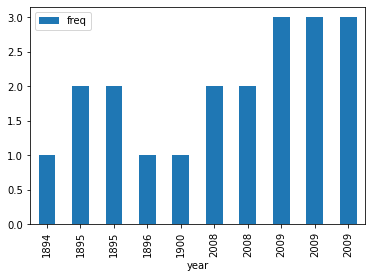

In [216]:
df.plot.bar(x='year', stacked=True)

In [275]:
df=pd.DataFrame({
    'year':[2019, 2018, 2017, 2019],
    'model':['a','b','c','d'],
    'Week':[17,18,19,20]
})
#df['age'] = np.where((2019 - df.year)==0,1,(2019 - df.year))
df

,year,model,Week
0,2019,a,17
1,2018,b,18
2,2017,c,19
3,2019,d,20


In [276]:
from datetime import date
today = date.today()
this_week = today.isocalendar()[1]
this_week

df.query('Week >= 17 and Week <= @this_week')

,year,model,Week
0,2019,a,17
1,2018,b,18
2,2017,c,19


In [271]:
d="""Date_Time
2020-09-08 23:59:41
2020-09-08 23:58:07
2020-09-08 23:59:42"""
df=pd.read_csv(StringIO(d))
df

,Date_Time
0,2020-09-08 23:59:41
1,2020-09-08 23:58:07
2,2020-09-08 23:59:42


In [270]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%Y-%m-%d %H:%M:%S')
df

,Date_Time
0,2020-09-08 23:59:41
1,2020-09-08 23:58:07
2,2020-09-08 23:59:42


In [277]:
import yfinance as yf
import numpy as np
import pandas as pd

df = yf.Ticker(company_name).history(period='1d', interval='1h')
df = df.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'])
df

AttributeError: module 'yfinance' has no attribute 'Ticker'

In [414]:
d="""as_date,end_date,pdate,A,b
05/11/2021,05/31/2021,05/08/2020,0.6,0.9
05/11/2021,05/31/2021,05/09/2020,0.8,0.4
05/12/2021,05/31/2021,05/10/2020,0.4,0.6
05/12/2021,05/31/2021,05/11/2020,0.5,0.4"""
df1=g(d)
df1

,as_date,end_date,pdate,A,b
0,05/11/2021,05/31/2021,05/08/2020,0.6,0.9
1,05/11/2021,05/31/2021,05/09/2020,0.8,0.4
2,05/12/2021,05/31/2021,05/10/2020,0.4,0.6
3,05/12/2021,05/31/2021,05/11/2020,0.5,0.4


In [415]:
d="""as_date, end_date,pdate,A,b
05/11/2021,05/11/2021,05/08/2021,1.6,0.9
05/11/2021,05/11/2021,05/09/2021,0.8,1.4
05/12/2021,05/11/2021,05/10/2021,1.4,0.6"""
df2=g(d)
df2

,as_date,end_date,pdate,A,b
0,05/11/2021,05/11/2021,05/08/2021,1.6,0.9
1,05/11/2021,05/11/2021,05/09/2021,0.8,1.4
2,05/12/2021,05/11/2021,05/10/2021,1.4,0.6


In [416]:
df2.columns += '_x' # To make it easier to concat
df1 = pd.concat([df1, df2], axis=1)
df1['end_date'] = np.where(df1.pdate_x.isna(),df1.end_date,df1.pdate_x)
df1 = df1.dropna(axis=1)

## Renaming columns of df2 as before
df2.columns = df2.columns.str.replace('_x','', regex=True) 
df1



,as_date,end_date,pdate,A,b
0,05/11/2021,05/08/2021,05/08/2020,0.6,0.9
1,05/11/2021,05/09/2021,05/09/2020,0.8,0.4
2,05/12/2021,05/10/2021,05/10/2020,0.4,0.6
3,05/12/2021,05/31/2021,05/11/2020,0.5,0.4


In [417]:


df2

,as_date,end_date,pdate,A,b
0,05/11/2021,05/11/2021,05/08/2021,1.6,0.9
1,05/11/2021,05/11/2021,05/09/2021,0.8,1.4
2,05/12/2021,05/11/2021,05/10/2021,1.4,0.6


In [386]:
pd.merge_asof(df1, df2, on='as_date', direction='nearest', allow_exact_matches=False)

,as_date,end_date,pdate_x,A_x,b_x,end_date,pdate_y,A_y,b_y
0,2021-05-11,05/31/2021,05/08/2020,0.6,0.9,05/11/2021,05/10/2021,1.4,0.6
1,2021-05-11,05/31/2021,05/09/2020,0.8,0.4,05/11/2021,05/10/2021,1.4,0.6
2,2021-05-12,05/31/2021,05/10/2020,0.4,0.6,05/11/2021,05/09/2021,0.8,1.4
3,2021-05-12,05/31/2021,05/11/2020,0.5,0.4,05/11/2021,05/09/2021,0.8,1.4


In [392]:
pd.merge_ordered(df1, df2, on='as_date', how='left')

,as_date,end_date,pdate_x,A_x,b_x,end_date,pdate_y,A_y,b_y
0,05/11/2021,05/31/2021,05/08/2020,0.6,0.9,05/11/2021,05/08/2021,1.6,0.9
1,05/11/2021,05/31/2021,05/08/2020,0.6,0.9,05/11/2021,05/09/2021,0.8,1.4
2,05/11/2021,05/31/2021,05/09/2020,0.8,0.4,05/11/2021,05/08/2021,1.6,0.9
3,05/11/2021,05/31/2021,05/09/2020,0.8,0.4,05/11/2021,05/09/2021,0.8,1.4
4,05/12/2021,05/31/2021,05/10/2020,0.4,0.6,05/11/2021,05/10/2021,1.4,0.6
5,05/12/2021,05/31/2021,05/11/2020,0.5,0.4,05/11/2021,05/10/2021,1.4,0.6


In [2]:
d="""etiqueta,suma
2015-10,33
Baja California,12
Campeche,21
2015-11,12
Colima,6
Ciudad de México,6
2015-12,30
Ciudad de México,20
Quintana Roo,10"""
df=g(d)
df

,etiqueta,suma
0,2015-10,33
1,Baja California,12
2,Campeche,21
3,2015-11,12
4,Colima,6
5,Ciudad de México,6
6,2015-12,30
7,Ciudad de México,20
8,Quintana Roo,10


In [11]:
df['fecha']=df.groupby(df['etiqueta'].str.contains('\d').cumsum())['etiqueta'].apply(lambda x: x.str.extract('(\d{4}\-\d{2})')).fillna(method='ffill')
df[~df['etiqueta'].str.contains('-\d')].pivot(index='fecha', columns='etiqueta', values='suma').fillna(0).reset_index()


etiqueta,fecha,Baja California,Campeche,Ciudad de México,Colima,Quintana Roo
0,2015-10,12.0,21.0,0.0,0.0,0.0
1,2015-11,0.0,0.0,6.0,6.0,0.0
2,2015-12,0.0,0.0,20.0,0.0,10.0


In [49]:
d="""time
00:01:24
00:22:44
00:12:32
00:02:56"""
df=g(d)
df

,time
0,00:01:24
1,00:22:44
2,00:12:32
3,00:02:56


In [50]:
df['time'] = pd.to_datetime(df.time, format="%S:%H:%M").dt.time
df

,time
0,01:24:00
1,22:44:00
2,12:32:00
3,02:56:00


In [59]:
df = pd.DataFrame({'B': range(5)},
              index = [pd.Timestamp('20130101 09:00:00'),
                       pd.Timestamp('20130101 09:00:02'),
                       pd.Timestamp('20130101 09:00:03'),
                       pd.Timestamp('20130101 09:00:05'),
                       pd.Timestamp('20130101 09:00:06')])
df

,B
2013-01-01 09:00:00,0
2013-01-01 09:00:02,1
2013-01-01 09:00:03,2
2013-01-01 09:00:05,3
2013-01-01 09:00:06,4


In [66]:
query = pd.date_range(df.index[0], df.index[-1], freq='s')
time_window = pd.Timedelta(seconds=2)

f = lambda t: df[(t - time_window < df.index) & (df.index <= t)]["B"].mean()

[f(t) for t in query] # works but is slow


[0.0, 0.0, 1.0, 1.5, 2.0, 3.0, 3.5]

In [42]:
d="""segment,sales
Milk,10
Chocolate,30"""
high=g(d)
df_high = high

In [41]:
d="""segment,sku,sales
Milk,m2341,2
Milk,m235,3
Chocolate,c132,2
Chocolate,c241,5
Chocolate,c891,3"""
low=g(d)
df_low=low

In [47]:
low = low.merge(high, on='segment', how='left')
low

,segment,sku,sales_x,sales_y
0,Milk,m2341,4,10
1,Milk,m235,6,10
2,Chocolate,c132,6,30
3,Chocolate,c241,15,30
4,Chocolate,c891,9,30


In [53]:
df = DataFrame({
    'customerid':[1,1,1,1,2,2,2,2,2,2,2,],
    'code':list('abcdabcdefa'),
    'date1':['5/12/2019','5/13/2019','5/14/2019','5/15/2019', '3/4/2018',
        '3/5/2018','3/6/2018','3/7/2018','3/8/2018','3/9/2018','3/10/2018'],
    'date2':['5/12/2019','5/12/2019','5/12/2019','5/12/2019','3/10,2018',
            '3/10,2018','3/10,2018','3/10,2018','3/10,2018','3/10,2018','3/10,2018']
})
df

,customerid,code,date1,date2
0,1,a,5/12/2019,5/12/2019
1,1,b,5/13/2019,5/12/2019
2,1,c,5/14/2019,5/12/2019
3,1,d,5/15/2019,5/12/2019
4,2,a,3/4/2018,"3/10,2018"
5,2,b,3/5/2018,"3/10,2018"
6,2,c,3/6/2018,"3/10,2018"
7,2,d,3/7/2018,"3/10,2018"
8,2,e,3/8/2018,"3/10,2018"
9,2,f,3/9/2018,"3/10,2018"


In [59]:
df = pd.DataFrame({
    'date':[
1534636800,
1534723200,
1534809600,
1534896000,]
})
df

df['date'] = pd.to_datetime(df.date, unit='s')
df

,date
0,2018-08-19
1,2018-08-20
2,2018-08-21
3,2018-08-22


In [80]:
df = DataFrame({
    'latitude':['24.549999','24.549999', '24.549999',],
    'longitude':['-126.870003', '-126.370003', '-125.870003'],
    'time':np.repeat('2000-01-31', 3),
    'windspeed':['6.75', '6.66', '6.58']
})

df = df.set_index(['latitude', 'longitude','time'])
df

windspeed
latitude  longitude   time                
24.549999 -126.870003 2000-01-31      6.75
          -126.370003 2000-01-31      6.66
          -125.870003 2000-01-31      6.58

In [81]:
df.query('latitude == 24.549999 and longitude== -126.870003')

,,,windspeed
latitude,longitude,time,


In [82]:
df=pd.DataFrame({
    'cities':['c1','c2','c3','c4','c5','c6','c7','c8'],
    'category':['north', 'south', 'east', 'west','east', 'west','north', 'south']
})
df

,cities,category
0,c1,north
1,c2,south
2,c3,east
3,c4,west
4,c5,east
5,c6,west
6,c7,north
7,c8,south


In [77]:
df = df.groupby('category').cities.apply(lambda x: x.values).to_frame().reset_index()
df

,category,cities
0,east,"[c3, c5]"
1,north,"[c1, c7]"
2,south,"[c2, c8]"
3,west,"[c4, c6]"


In [84]:
df.groupby('category').cities.agg(list).to_frame().reset_index()

,category,cities
0,east,"[c3, c5]"
1,north,"[c1, c7]"
2,south,"[c2, c8]"
3,west,"[c4, c6]"
